# Steps:
    1. What is the type of problem and learning type(Task)?
       Figure out Datasets required, its format and apis or code to access to it(Experience).
       Permormance metric to guide the larning(P)
    2. Data preprocessing: Basic analysis with descriptive stats and visualizations(single and multivariate)
       then clean or fill missing values, scale or normalize the data across features.
    3. Split the data for train, validate and testing of the model
    4. Model steps:
        a) pick the model or ML alogrithm(based onlearning type) you want to use and its 
        corresponding api then import package
        b) Create instance of the model
        c) train the model with the train examples
        d) [optional] validate the model by tuning model hyper parameteres or feature selections 
        iteratively till the optimum parammetr/features are chosen
        e) evaluate the model with test data with appropriate metrics to 
        know the generalization performance.
        f) if generalized accuracy is not good repeat steps c-e by tuning(featue selections or hyper params)
      5. use it for prediction.
        
        

In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




In [2]:
print(__doc__)

import numpy as np
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Automatically created module for IPython interactive environment
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides le

In [3]:
print(len(diabetes))
print(diabetes.keys())
print(diabetes.data_filename)
print(diabetes.target_filename)
print(diabetes.feature_names)

7
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
C:\Users\Dharma\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz
C:\Users\Dharma\anaconda3\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [4]:
print(type(diabetes.target))
print(diabetes.target.shape)
print(diabetes.target[:10])

<class 'numpy.ndarray'>
(442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [5]:
print(type(diabetes.data))
print(diabetes.data.shape)
print(diabetes.data[:2])

<class 'numpy.ndarray'>
(442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [6]:
from scipy import stats
print(stats.describe(diabetes.data))

DescribeResult(nobs=442, minmax=(array([-0.10722563, -0.04464164, -0.0902753 , -0.1123996 , -0.12678067,
       -0.11561307, -0.10230705, -0.0763945 , -0.12609739, -0.13776723]), array([0.11072668, 0.05068012, 0.17055523, 0.13204422, 0.15391371,
       0.19878799, 0.18117906, 0.18523444, 0.13359898, 0.13561183])), mean=array([-3.63428493e-16,  1.30834257e-16, -8.04534920e-16,  1.28165452e-16,
       -8.83531559e-17,  1.32702421e-16, -4.57464634e-16,  3.77730150e-16,
       -3.83085422e-16, -3.41288202e-16]), variance=array([0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
       0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757]), skewness=array([-0.23059556,  0.12695182,  0.59611666,  0.2896765 ,  0.37682382,
        0.43510876,  0.79654015,  0.73287568,  0.29078271,  0.20721035]), kurtosis=array([-0.67719869, -1.98388324,  0.08047813, -0.54031588,  0.21677706,
        0.58105569,  0.95689553,  0.42584638, -0.14639468,  0.22070114]))


In [7]:
import pandas as pd
df = pd.DataFrame(diabetes.data)
print(df.describe())
print(df.info())

                  0             1             2             3             4  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                  5             6             7             8             9  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [32]:
# Feature selection - forward/backward
# include only Blood Sugar
#diabetes_X = diabetes.data[:, 9:10]
# include  BMI & BP
#diabetes_X = diabetes.data[:, 2:4]
# include only BMI, BP & Sugar
#diabetes_X = diabetes.data[:, (2,3,9)]

# correlations include only BMI, BP, Sugar, one of 4-7
#diabetes_X = diabetes.data[:, (2,3,5,9)]
#diabetes_X = diabetes.data[:, (0,1,2,3,5,8,9)]

# correlations on target include only 2,8,3,7
#diabetes_X = diabetes.data[:, (2,3,8,7)]
#diabetes_X = diabetes.data[:, (2,3,5,8,7,9)]

#include everything
diabetes_X = diabetes.data[:,:]
print(diabetes_X.shape)
print(diabetes_X[0:2])

(442, 10)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


In [54]:
print(X_train)
X_train_x0 = np.insert(X_train, 0, 1, axis=1)
print(X_train_x0)
#help(np.insert)

[[ 0.03081083  0.05068012  0.03259528 ...  0.03430886  0.06301662
   0.00306441]
 [ 0.07440129 -0.04464164  0.08540807 ... -0.00259226  0.00620932
   0.08590655]
 [-0.05637009  0.05068012 -0.0105172  ...  0.03430886  0.02061233
   0.0569118 ]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090444
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845911
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514531
  -0.0010777 ]]
[[ 1.          0.03081083  0.05068012 ...  0.03430886  0.06301662
   0.00306441]
 [ 1.          0.07440129 -0.04464164 ... -0.00259226  0.00620932
   0.08590655]
 [ 1.         -0.05637009  0.05068012 ...  0.03430886  0.02061233
   0.0569118 ]
 ...
 [ 1.          0.03081083 -0.04464164 ... -0.03949338 -0.01090444
  -0.0010777 ]
 [ 1.         -0.01277963 -0.04464164 ... -0.00259226 -0.03845911
  -0.03835666]
 [ 1.         -0.09269548 -0.04464164 ... -0.03949338 -0.00514531
  -0.0010777 ]]


In [56]:
#IMP
#normal equation
from scipy import linalg
X_T = X_train_x0.transpose()
X_T_X = X_T.dot(X_train_x0)
Pinv = linalg.inv(X_T_X).dot(X_T)
#print(Pinv)
#print(linalg.pinv(X_train))
coef = Pinv.dot(y_train)
print(coef)
E = X_train_x0.dot(coef) - y_train
print(X_train.shape[0])
MSE =  ((E.T ).dot(E))/(2*X_train_x0.shape[0])
print(MSE)

[ 151.00818273   29.25034582 -261.70768053  546.29737263  388.40077257
 -901.95338706  506.761149    121.14845948  288.02932495  659.27133846
   41.37536901]
309
1462.020839453645


In [64]:
#Test scores
X_test_x0 = np.insert(X_test, 0, 1, axis=1)
TE = X_test_x0.dot(coef) - y_test
MSE =  ((TE.T ).dot(TE))/(2*X_test_x0.shape[0])
print(MSE*2)
print(MSE)

2821.7385595843793
1410.8692797921897


In [ ]:
#GD

In [61]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Bias: \n', regr.intercept_)

Coefficients: 
 [  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]
Bias: 
 151.00818273080338


In [62]:
# Test accuracy-Generalization
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))

0.47729201741573324
0.5244132008226972


In [59]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error:{}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, y_pred)))

Mean squared error:2821.7385595843766
Variance score: 0.47729201741573324


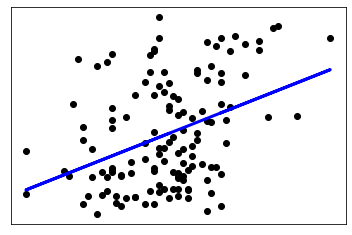

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

          0         1         2         3         4         5         6  \
0  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
1  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
2  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
3  0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
4  0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
5  0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
6 -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
7  0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
8  0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
9  0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   

          7         8         9  
0  0.203841  0.270777  0.301731  
1  0.332115  0.149918  0.208133  
2  0.413807  0.446159  0.388680  
3  0.257653  0.393478  0.390429  
4  0

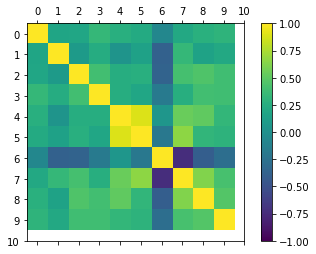

In [14]:
#Feature selections - Correlations among features -low
#Correlation Matrix Plot
fig=plt.figure()
ax=fig.add_subplot(111)

correlations=df.corr()
print(correlations)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [15]:
#Feature selections - Correlation between feature & Target - high
inputdf = pd.DataFrame(diabetes.data)
outputdf = pd.DataFrame(diabetes.target)
fulldf = pd.concat((inputdf, outputdf), axis = 1)
print(fulldf.shape)
fulldf.head(5)

(442, 11)


,0,1,2,3,4,5,6,7,8,9,0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


          0         1         2         3         4         5         6  \
0  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
1  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
2  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
3  0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
4  0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
5  0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
6 -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
7  0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
8  0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
9  0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
0  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

          7         8         9         0  
0  0.203841  0.270777  0.301731  0.187889  
1  0.332115

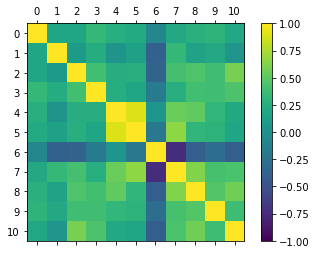

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

correlations=fulldf.corr()
print(correlations)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [17]:
#Regularization - L1, L2, L1+L2

In [18]:
#increase model capacity  - non-linear

In [19]:
#Using Iterative approach for optimization - SGD
from sklearn import linear_model

# Create linear regression object
regr = linear_model.SGDRegressor(max_iter = 10000, alpha=0.0001)
# Train the model using the training sets
regr.fit(X_train, y_train)

# Test accuracy-Generalization
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Bias: \n', regr.intercept_)


0.11590140432764173
0.11842063173206974
Coefficients: 
 [351.2951486]
Bias: 
 [152.87720604]


# Exercises
# try with various feature subsets and figure out which subset gives the best score
# try above for both LinearRegression & SGDRegressor apis
#Try with various regu;larizers like Lasso() & Elasticnet()

# Find best model using Linear Regression algorithm with the following instructions?
•	Use Boston house price dataset (load_boston)
•	Use data pre-processing with data standardization
•	Use train test split – 70 %– 30%
•	Select best subset of features with size – 3 and note down accuracy?

# Find best model using Linear Regression algorithm with the following instructions?
•	Use Diabetes dataset (load_diabetes)
•	Use data pre-processing with min-max scaler
•	Use train test split – 75 %– 25%
•	Select best subset of features using co-relations and note down accuracy? 